# Rona Habibi

## Research question/interests

**Is there a distinct relationship between an increase in emission and an increase in natural disasters? Can we assume that the natural disasters are induced by rising emission rates?**

#### I am interested in the relationship between an increase over time of natural disasters and carbon dioxide emission in relation to climate change.

###### Let's start by importing:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df_nd = pd.read_csv("../data/raw/1900_2021_DISASTERS.csv") # Natural Disasters dataframe
df_nd.head(5)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
df_emis = pd.read_csv("../data/raw/owid_emissions.csv") # Emissions dataframe
df_emis.head(-5)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46513,Zimbabwe,2012,ZWE,13265331.0,2.090997e+10,0.566,0.043,11.254,0.891,8.594,...,NaN,0.0,0.0,0.297,0.032,NaN,42.29,30.72,0.835,7.418
46514,Zimbabwe,2013,ZWE,13555420.0,2.112350e+10,0.463,0.034,11.671,0.418,3.711,...,NaN,0.0,0.0,0.281,0.035,NaN,42.17,30.61,0.682,5.842
46515,Zimbabwe,2014,ZWE,13855758.0,2.122250e+10,0.496,0.036,11.946,0.275,2.354,...,NaN,0.0,0.0,0.234,0.032,NaN,40.39,28.90,0.990,8.284
46516,Zimbabwe,2015,ZWE,14154937.0,2.102745e+10,0.585,0.041,12.255,0.309,2.585,...,NaN,0.0,0.0,0.199,0.030,NaN,42.30,30.70,1.333,10.879


# Cleaning the Data


In [ ]:
df_nd.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,1436.000000,1436.000000,5.000000,5.000000e+01,1436.000000,1388.000000,690.000000,1436.000000,1400.000000,799.000000,1217.000000,144.000000,1.124000e+03,0.0,1.261000e+03,0.0,0.0,0.0,1431.000000
mean,2000.885097,385.461003,3845.400000,1.104192e+06,2000.919220,5.600865,12.130435,2001.043872,6.162857,15.316646,213.422350,17479.458333,2.359717e+04,NaN,2.302955e+04,NaN,NaN,NaN,68.157450
std,9.891680,232.894555,3981.772068,2.325774e+06,9.903036,3.843259,9.860733,9.973422,3.633974,9.451690,631.434673,52314.523430,2.192103e+05,NaN,2.080360e+05,NaN,NaN,NaN,17.197140
min,1970.000000,1.000000,244.000000,2.900000e+03,1970.000000,1.000000,1.000000,1970.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,15.001282
25%,1997.000000,157.500000,417.000000,6.529525e+04,1997.000000,1.000000,1.000000,1997.000000,3.000000,6.000000,15.000000,221.500000,2.000000e+02,NaN,2.000000e+02,NaN,NaN,NaN,62.020757
50%,2001.000000,404.500000,2346.000000,2.470000e+05,2001.000000,5.000000,11.500000,2001.000000,6.000000,15.000000,42.000000,1051.500000,8.000000e+02,NaN,8.510000e+02,NaN,NaN,NaN,68.415379
75%,2007.000000,556.000000,7920.000000,9.664758e+05,2007.000000,9.000000,20.750000,2007.000000,9.250000,23.000000,143.000000,6138.000000,4.869000e+03,NaN,4.917000e+03,NaN,NaN,NaN,80.113393
max,2021.000000,882.000000,8300.000000,1.302587e+07,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,8000.000000,461542.000000,6.500000e+06,NaN,6.500000e+06,NaN,NaN,NaN,100.000000


#### lets take a look at all the different types of Disasters

In [ ]:
df_nd.value_counts("Disaster Type")

Disaster Type
Flood                    5272
Storm                    4005
Epidemic                 1436
Earthquake               1137
Landslide                 713
Drought                   685
Extreme temperature       584
Wildfire                  452
Volcanic activity         222
Insect infestation         93
Mass movement (dry)        41
Glacial lake outburst       2
Animal accident             1
Impact                      1
dtype: int64

In [ ]:
df_clean1 = df_nd[df_nd["Disaster Type" ]== "Epidemic"] # we will be removing any rown with epidemic, as we are not interested in natural disasters in diseases.
df_clean1.head(5)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
15,1970-0057-CIV,1970,57,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,NaN,1500.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
23,1970-0006-CYP,1970,6,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
28,1970-0007-ETH,1970,7,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,NaN,4000.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
134,1974-0127-BRA,1974,127,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,NaN,...,NaN,30000.0,NaN,NaN,NaN,19.051854,NaN,NaN,NaN,NaN
164,1975-0068-BRA,1975,68,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,NaN,...,NaN,107.0,NaN,NaN,NaN,20.793799,NaN,NaN,NaN,NaN


In [ ]:
top5_list =["Flood", "Storm", "Drought", "Wildfire"]
nat_dis5 = df_nd[df_nd["Disaster Type"].isin(top5_list)].reset_index()
nat_dis5.head(-5)

,index,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10404,14633,2021-0373-VCT,2021,373,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,...,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10405,14634,2021-0269-VEN,2021,269,NaN,Natural,Hydrological,Flood,NaN,NaN,...,NaN,1200.0,NaN,NaN,NaN,NaN,2,NaN,32029,Tulio Febres Cordero (Adm2).
10406,14635,2021-0171-VNM,2021,171,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,...,1000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10407,14636,2021-0217-VNM,2021,217,NaN,Natural,Hydrological,Flood,Flash flood,NaN,...,NaN,180.0,NaN,NaN,NaN,NaN,1;2,3345,32447;32671,"Ha Giang (Adm1). Tran Yen, Van Ban (Adm2)."


##### Let us remove the data that is irrelavant to my research question. In short lets keep the columns Country, Region and Contient for our plots to keep track of locations. Let us also keep the Disaster Types and Subgroups and Year so we can track "how many of what happened where?".

In [ ]:
dfclean = nat_dis5.iloc[:,[2,6,7,11,13,14,]]
dfclean


,Year,Disaster Subgroup,Disaster Type,Country,Region,Continent
0,1970,Hydrological,Flood,Argentina,South America,Americas
1,1970,Meteorological,Storm,Australia,Australia and New Zealand,Oceania
2,1970,Hydrological,Flood,Benin,Western Africa,Africa
3,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
4,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
...,...,...,...,...,...,...
10409,2021,Hydrological,Flood,Yemen,Western Asia,Asia
10410,2021,Hydrological,Flood,Yemen,Western Asia,Asia
10411,2021,Hydrological,Flood,South Africa,Southern Africa,Africa
10412,2021,Hydrological,Flood,Serbia,Southern Europe,Europe


#### Let us do some plotting, starting off with a box plot so we can visualize where the majority 50% of types of natural disasters falls in regards to years between 1970 and 2021

<seaborn.axisgrid.FacetGrid>

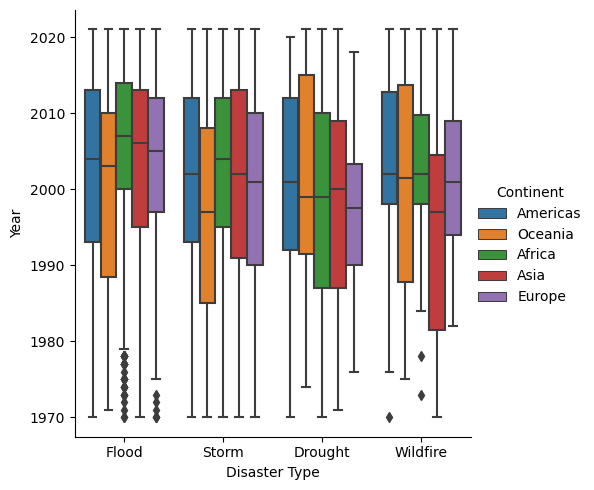

In [ ]:
sns.catplot(data = dfclean, x= "Disaster Type",y = "Year", hue="Continent", kind="box")

This did not get us very far lets do some more EDA!

In [ ]:
df1= dfclean.groupby('Disaster Type')['Year'].count()
df1=df1.to_frame()

df1

,Year
Disaster Type,
Drought,685
Flood,5272
Storm,4005
Wildfire,452


In [ ]:
#Creating new data frame
#I have decided to create a data set which relates the frequency of natural disasters to the year so we can analyze the trends from ovdr the last 50 years.

num_ND = dfclean.groupby('Year')['Disaster Type'].count()
num_ND1 = pd.DataFrame(num_ND)
num_ND1

,Disaster Type
Year,
1970,60
1971,45
1972,48
1973,48
1974,53
1975,49
1976,64
1977,95
1978,100


##### Let us create a basic scatterplot so we can see the trend in natural disaster occurances throughou the year.

[Text(0.5, 1.0, 'Scatter plot showing the frequency of natural disasters around the world since 1970')]

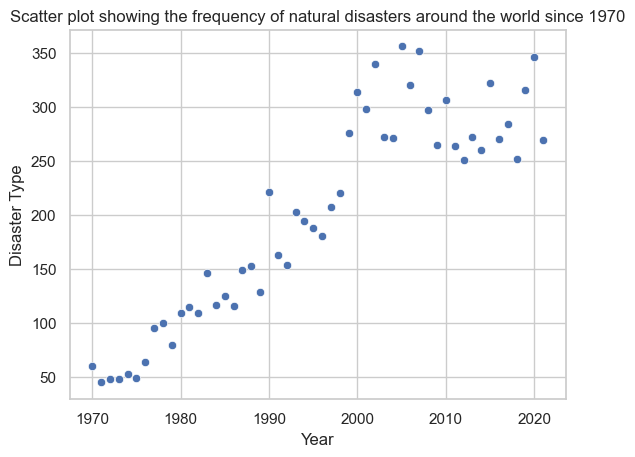

In [ ]:
sns.scatterplot(data = num_ND1, x = "Year", y = "Disaster Type" ).set(title="Scatter plot showing the frequency of natural disasters around the world since 1970")


In [ ]:
dfclean.value_counts("Continent")
continent_list = ["Asia","Americas","Africa", "Europe", "Oceania"]
continents = dfclean[dfclean["Continent"].isin(continent_list)].reset_index()
continents= continents.drop(["index"], axis=1)
continents

,Year,Disaster Subgroup,Disaster Type,Country,Region,Continent
0,1970,Hydrological,Flood,Argentina,South America,Americas
1,1970,Meteorological,Storm,Australia,Australia and New Zealand,Oceania
2,1970,Hydrological,Flood,Benin,Western Africa,Africa
3,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
4,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
...,...,...,...,...,...,...
10409,2021,Hydrological,Flood,Yemen,Western Asia,Asia
10410,2021,Hydrological,Flood,Yemen,Western Asia,Asia
10411,2021,Hydrological,Flood,South Africa,Southern Africa,Africa
10412,2021,Hydrological,Flood,Serbia,Southern Europe,Europe


<AxesSubplot:xlabel='Year', ylabel='Disaster Type'>

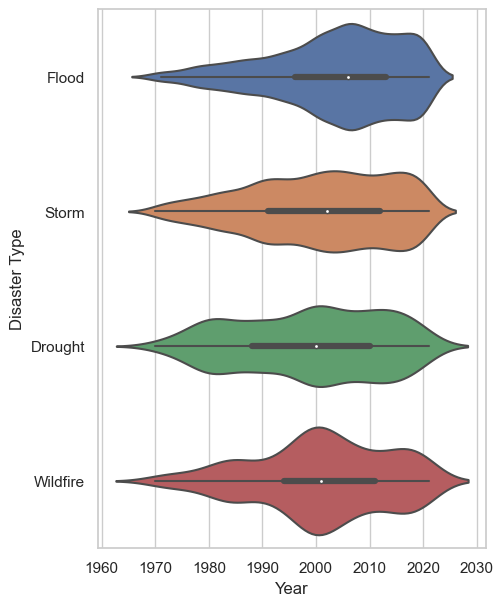

In [ ]:
plt.figure(figsize=(5,7))
sns.violinplot(data=continents, x= "Year", y= "Disaster Type")

#### Let's plot out the number of natural disasters throughout 1970 to 2021:

Text(0.5, 1.0, 'Number of Natural Disasters Per Year')

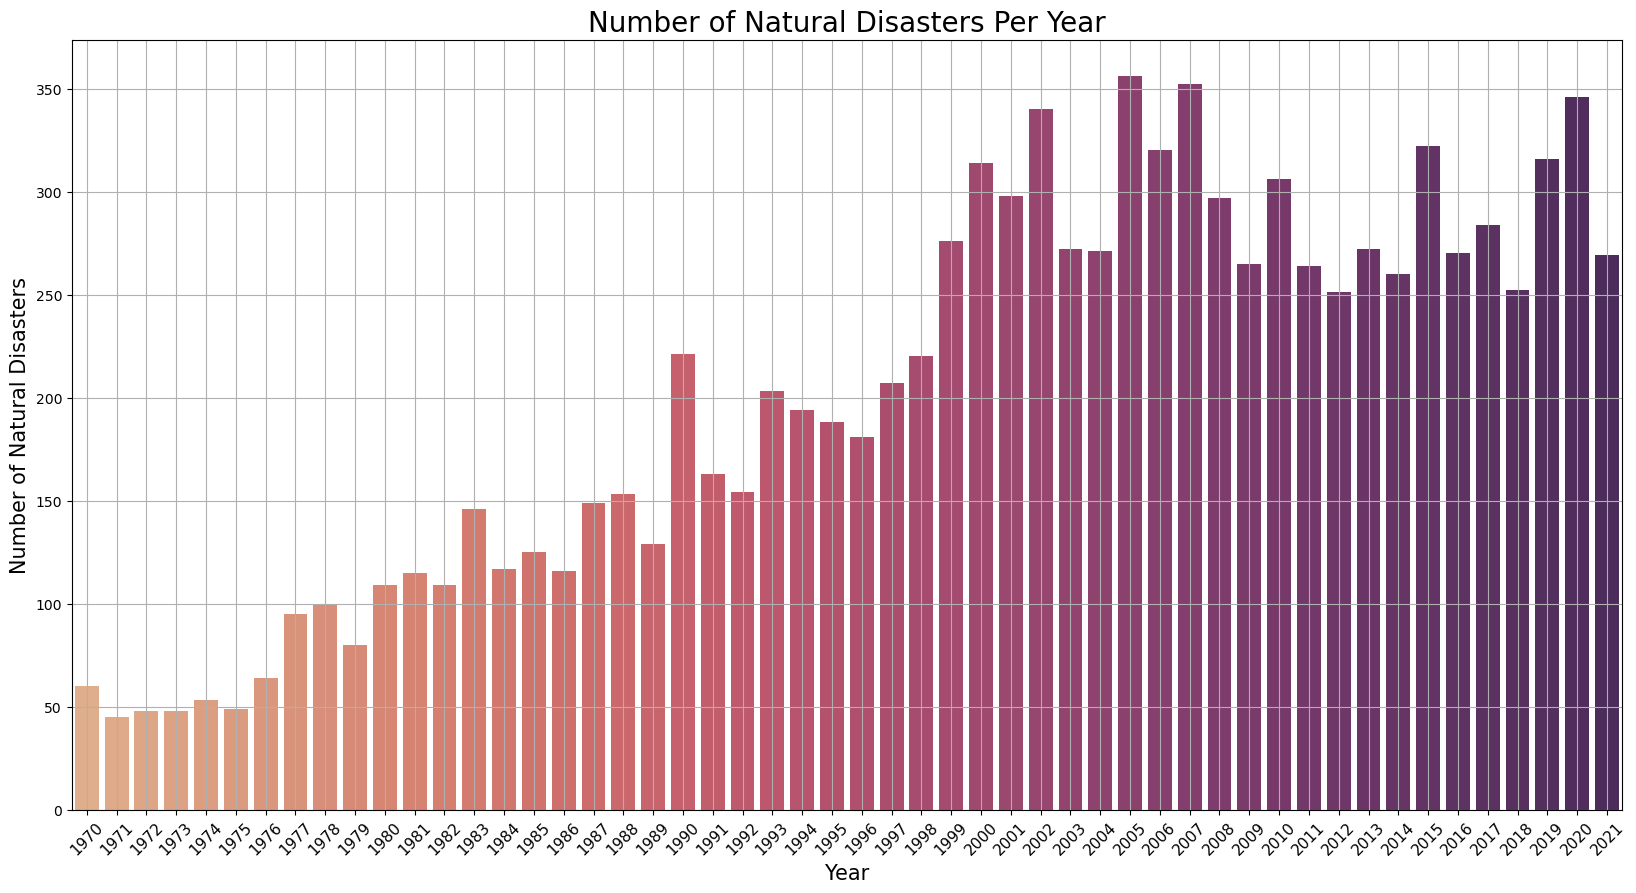

In [ ]:
plt.figure(figsize=(20,10))
ndperyear = sns.countplot(data = dfclean, x='Year', palette = 'flare')
plt.xticks(rotation=45,fontsize = 11)
ndperyear.grid()
ndperyear.set_xlabel("Year", fontsize = 15)
ndperyear.set_ylabel("Number of Natural Disasters", fontsize = 15)
plt.title("Number of Natural Disasters Per Year",fontsize = 20) # maybe change font size?


Now that we have a visual lets recreate this exact one by adding a hue of disaster types to see where the high ends are:

Text(0.5, 1.0, 'Number of Natural Disaster Types Per Year')

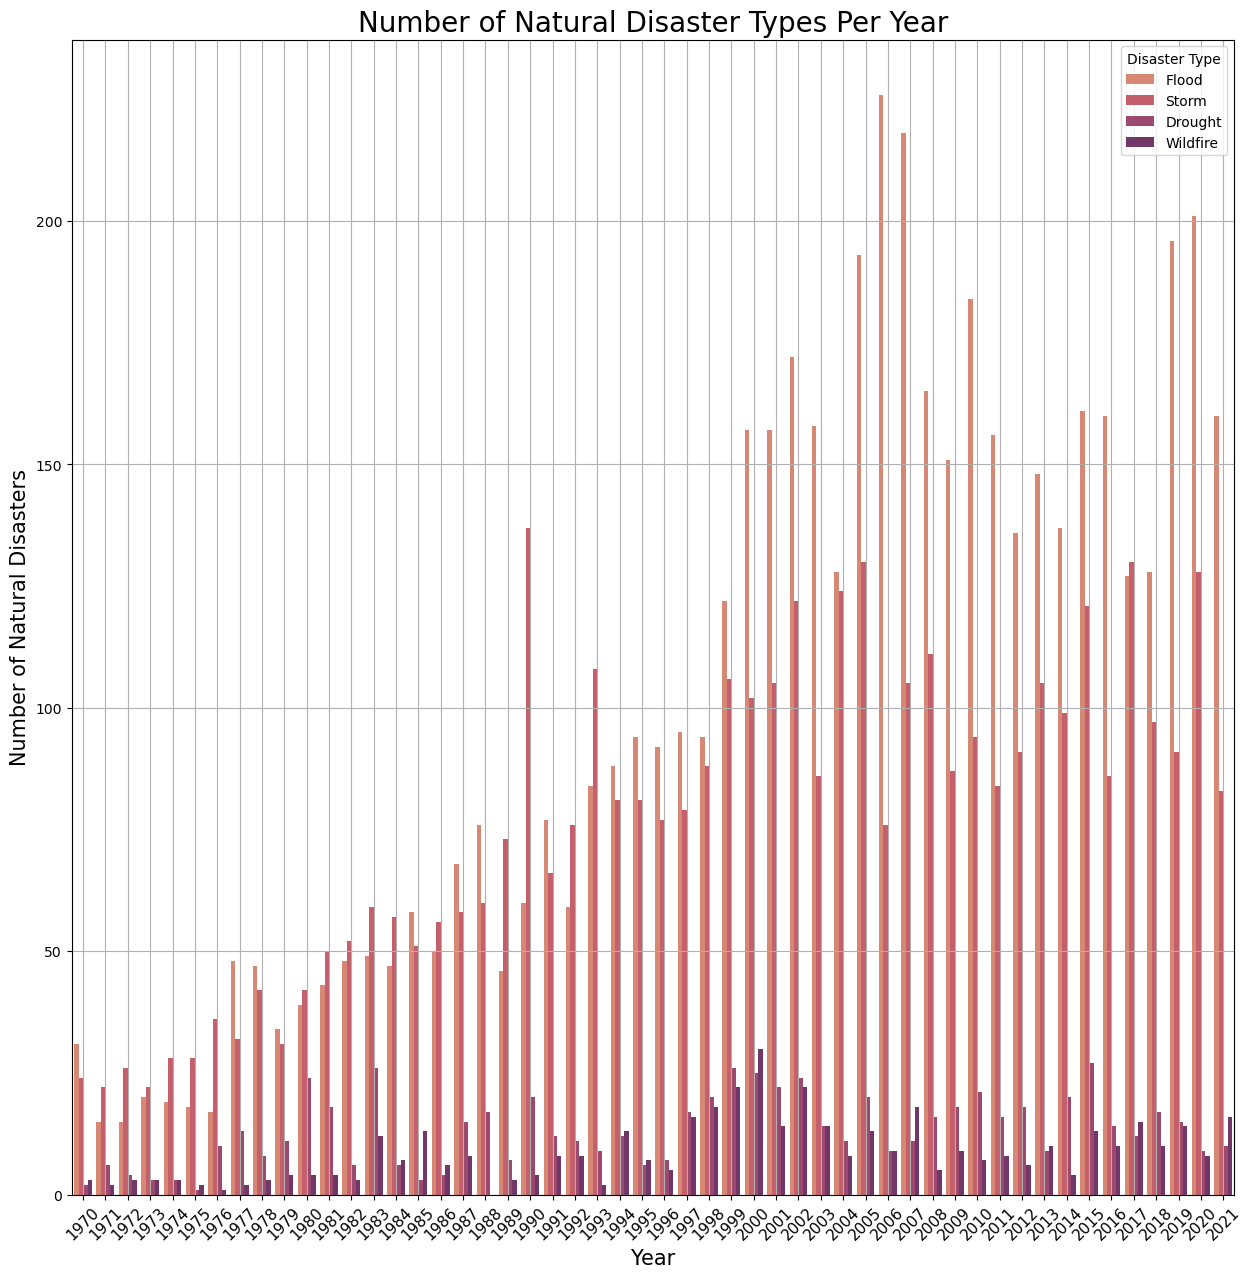

In [ ]:
plt.figure(figsize=(15,15))
ndtperyear = sns.countplot(data = dfclean, x='Year', hue = "Disaster Type", palette = 'flare')
plt.xticks(rotation=45,fontsize = 11)
ndtperyear.grid()
ndtperyear.set_xlabel("Year", fontsize = 15)
ndtperyear.set_ylabel("Number of Natural Disasters", fontsize = 15)
plt.title("Number of Natural Disaster Types Per Year",fontsize = 20)

#### From this graph above, we can see that floods are typically higher in count. Let us take a closer look and investigate specifically floods as a disaster type:

In [ ]:
df_clean1 = df_nd[df_nd["Disaster Type" ]== "Flood"] # we will be removing any rown with epidemic, as we are not interested in natural disasters in diseases.
df_clean1

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
5,1970-0035-BGD,1970,35,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,10000000.0,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
8,1970-0037-BRA,1970,37,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,104371.0,NaN,NaN,46000.0,15.001282,NaN,NaN,NaN,NaN
9,1970-0054-BRB,1970,54,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,210.0,NaN,NaN,500.0,15.001282,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14638,2021-0270-YEM,2021,270,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,22380.0,NaN,NaN,NaN,NaN,1,3407;3408;3411;3419;3420;3421;3424;3425;144970...,NaN,"Abyan, Aden, Al Dhale'e, Al Hudaydah, Hadramau..."
14639,2021-0449-YEM,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14640,2021-0075-ZAF,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,400.0,NaN,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
14642,2021-0020-SRB,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [ ]:
dfclean.to_csv("../data/processed/processedNatDisasterData.csv")

After doing this EDA, I believe I will be adapting my research question into some more specifics. I am wondering if, out of the 4 disaster types I have analyzed above, there will be more imminent trend that affect eachother. We can see in one of the plots, as floods increase, logically, droughts decrease. I would also like to learn more and maybe do some additional research on the effects on regions as well as globally.